In [1]:
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
from scipy import signal 

from datetime import datetime, timedelta

import matplotlib.pyplot as plt

from utility_programs.read_routines.GITM import auto_read as auto_read_gitm
from  utility_programs.read_routines.SAMI import auto_read as auto_read_sami
from utility_programs.filters import make_fits

import gc

from tqdm.auto import tqdm
import glob

import importlib

/glade/work/abukowski/conda-envs/SAMI3-GITM/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [20]:
gitmcol  = 'Rho'
samicol  = 'edens'


t_11 = datetime(2011,11,20)
t_05 = datetime(2011, 5,20)

t_start0 = timedelta(days=1, hours = 10)
t_end0 = timedelta(days=1, hours=18) # hours

afewtimes = [10,20,30,40,50,60]
afewtimes2 = [10,20,30,40,50,60,70,80]

dir11 = '/glade/u/home/abukowski/scratch/simstorm-20111121/postprocessed/'
dir05 = '/glade/u/home/abukowski/scratch/simstorm-20110521/postprocessed/'

In [3]:
times = []
t = datetime(2011,5,20)
max_dtime = t + timedelta(days=7)
while t < max_dtime:
    times.append(t)
    t+=timedelta(minutes=5)
times = np.array(times)

start_idx = np.argmin(np.abs(times - (datetime(2011,5,21,10))))
end_idx = np.argmin(np.abs(times - datetime(2011,5,21,18)))

In [4]:
start_idx, end_idx

(408, 504)

In [5]:
def get_fit(array):
    return xr.apply_ufunc(make_fits, array)

def get_diffs(array):
    return 100*(array - get_fit(array))/array

In [ ]:
may_edens_full = auto_read_sami(dir05+"Full", cols=samicol, start_idx=start_idx, end_idx = end_idx, use_dask = False)
may_edens_half = auto_read_sami(dir05+"Half", cols=samicol, start_idx=start_idx, end_idx = end_idx, use_dask = False)

may_rho_full = auto_read_gitm(dir05+"Full", start_idx=start_idx, end_idx=end_idx, cols = gitmcol)
may_rho_half = auto_read_gitm(dir05+"Half", start_idx=start_idx, end_idx=end_idx, cols = gitmcol)

In [ ]:
# nov_ds['fulledens'] = autoread_from_dir(t_05,
#                                     t_05 + t_start0,
#                                     t_05 + t_end0,
#                                     '/glade/u/home/abukowski/scratch/simstorm-20111121/postprocessed/Full/SAMI_REGRID*.nc',
#                                     samicol)

# nov_ds['halfedens'] = autoread_from_dir(t_05,
#                                     t_05 + t_start0,
#                                     t_05 + t_end0,
#                                     '/glade/u/home/abukowski/scratch/simstorm-20111121/postprocessed/Half/SAMI_REGRID*.nc',
#                                     samicol)

# nov_ds['fullrho'] = autoread_from_dir(t_05,
#                                     t_05 + t_start0,
#                                     t_05 + t_end0,
#                                     '/glade/u/home/abukowski/scratch/simstorm-20111121/postprocessed/Full/GITM*.nc',
#                                     gitmcol)

# nov_ds['halfrho'] = autoread_from_dir(t_05,
#                                     t_05 + t_start0,
#                                     t_05 + t_end0,
#                                     '/glade/u/home/abukowski/scratch/simstorm-20111121/postprocessed/Full/GITM*.nc',
#                                     gitmcol)

In [17]:
def panel_of_maps(da,
                  times,
                  vlims,):
    
    p = da.isel(time=times).plot(x="lon", y="lat", col="time",
                                     transform=ccrs.PlateCarree(),
                                     subplot_kws={"projection": ccrs.PlateCarree()},
                                     col_wrap=2, vmin=-vlims, vmax = vlims, cmap = 'bwr',
                                    aa=True)

    for ax in p.axs.flatten():
        ax.coastlines(alpha=0.6)
        ax.gridlines(alpha=0.7)

    plt.show()
    plt.close('all')


#     p = da.isel(time=afewtimes).plot(x="lon", y="lat", col="time",
#                                      transform=ccrs.PlateCarree(),
#                                      subplot_kws={"projection": ccrs.PlateCarree()},
#                                      col_wrap=2, vmin=-vlims, vmax = vlims, cmap = 'bwr')

#     for ax in p.axs.flatten():
#         ax.coastlines(alpha=0.6)
#         ax.gridlines(alpha=0.7)

    plt.show()
    plt.close('all')

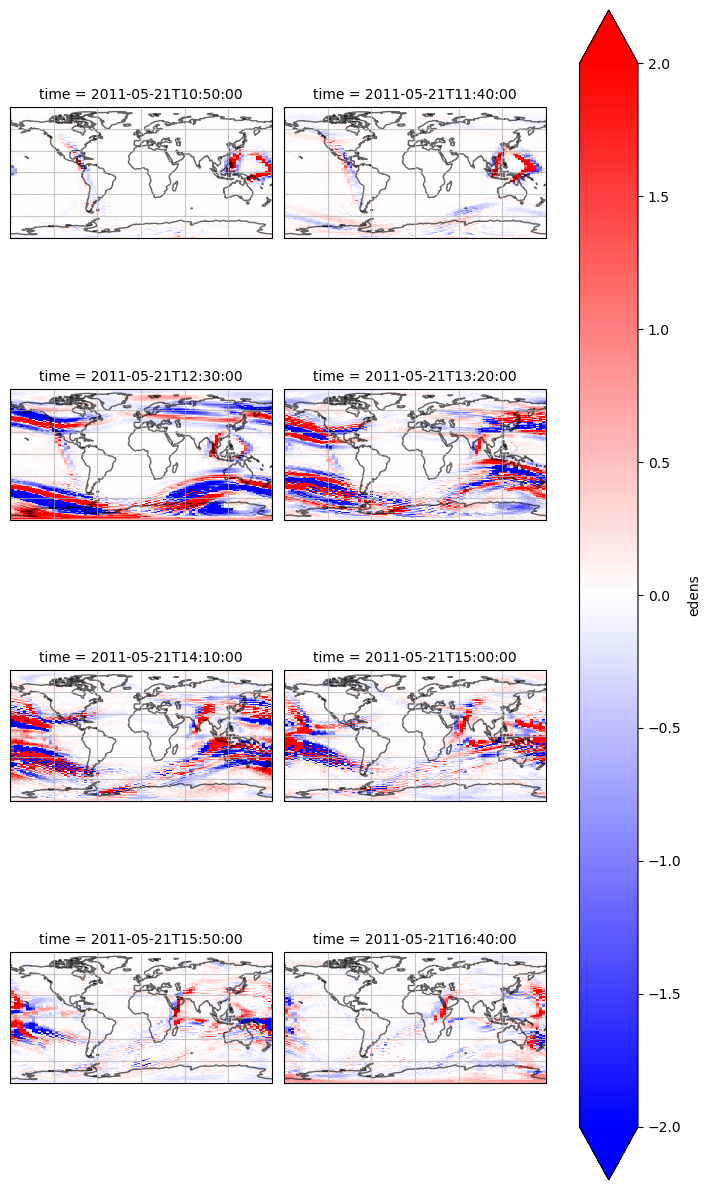

In [21]:
panel_of_maps(get_diffs(may_edens_full.edens.sel(alt=250, method='nearest')),
              afewtimes2, 2)

In [23]:
nov_ds.fullrho

<xarray.DataArray 'fullrho' (time: 96, lon: 90, lat: 180, alt: 40)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
...
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * time     (time) datetime64[ns] 2011-11-21T10:00:00 ... 2011-11-21T17:55:00
  * alt      (alt) float64 212.5 262.5 312.5 ... 2.062e+03 2.112e+03 2.162e+03
  * lat      (lat) float64 -89.75 -88.75 -87.75 -86.75 ... 87.25 88.25 89.25
  * lon      (lon) float64 1.0 5.0 9.0 13.0 17.0 ... 345.0 349.0 353.0 357.0

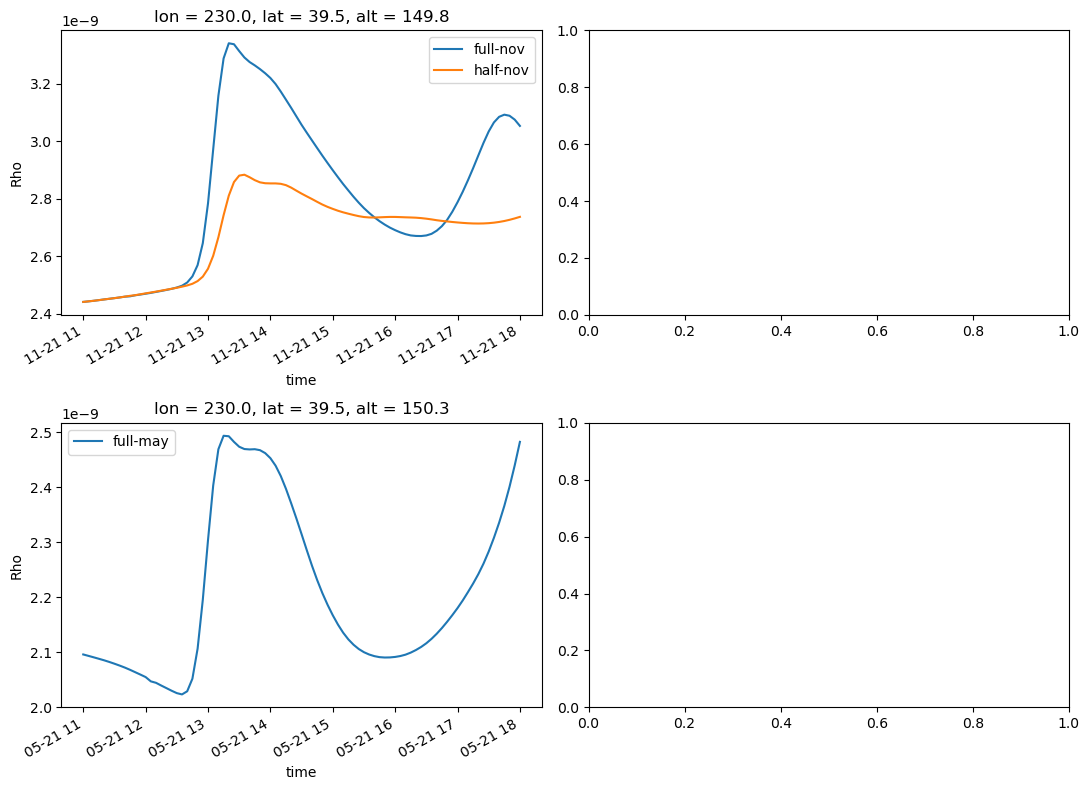

In [108]:
fig, axs = plt.subplots(nrows=2, ncols = 2, figsize=(11,8))

full11.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[0, 0], label='full-nov')
half11.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[0, 0], label='half-nov')
full5.Rho.sel(lon=180+50, alt=150, lat=40, method='nearest').plot(ax=axs[1, 0], label='full-may')






axs[0,0].legend()
axs[1,0].legend()
fig.tight_layout()

plt.show()
plt.close()

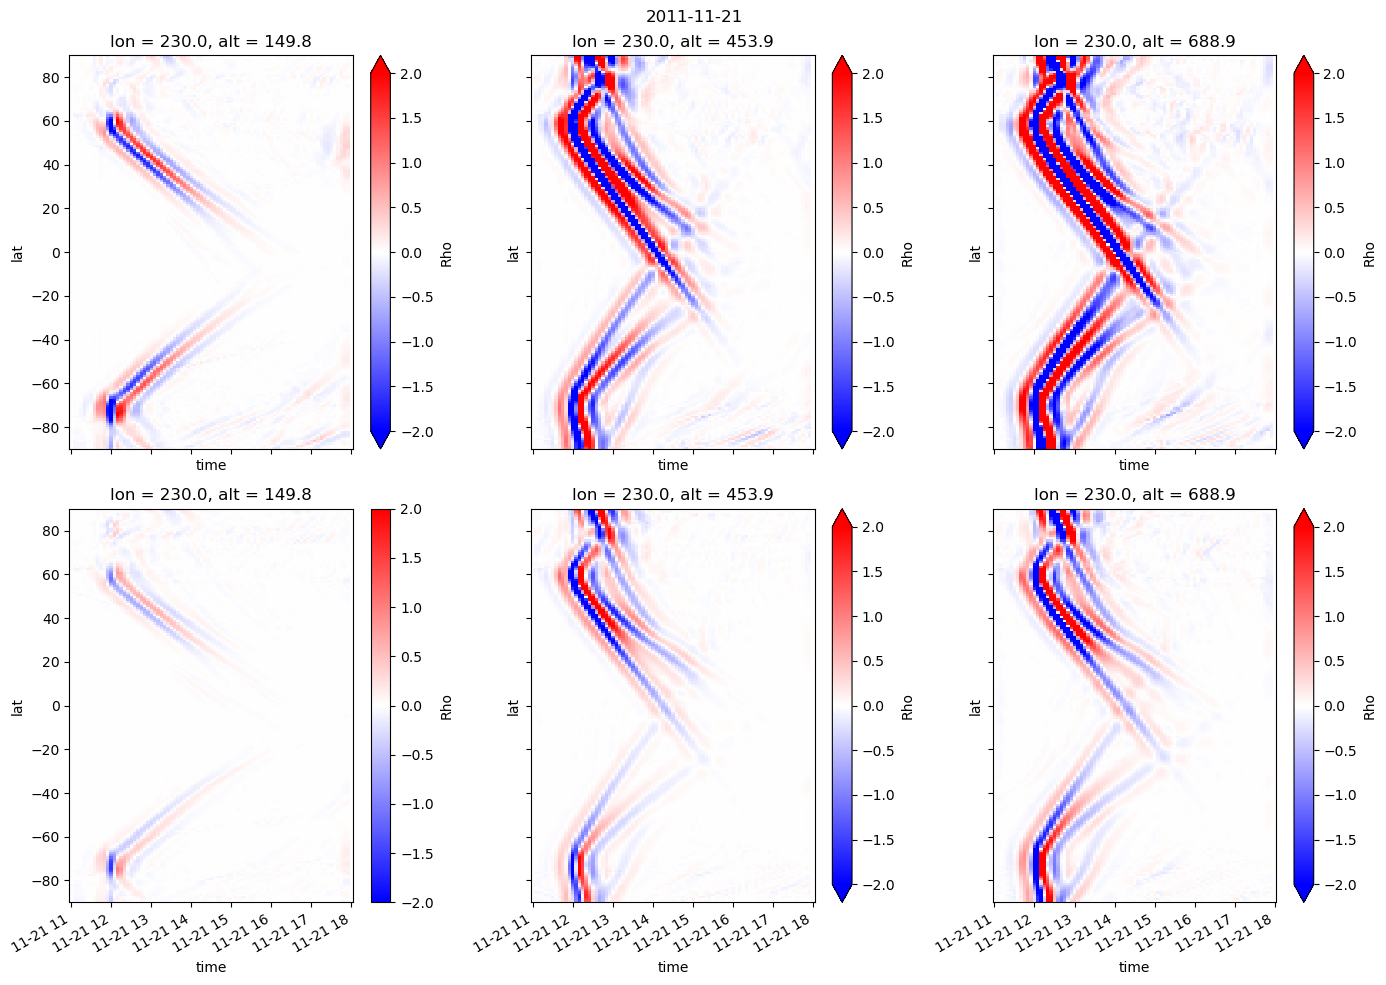

In [97]:
fig, axs = plt.subplots(nrows=2, ncols = 3, figsize=(14,10), sharex=True, sharey=True)

plot_args = {'x':'time',
            'vmin':-2,
            'vmax':2,
            'cmap':'bwr'}


full11_diffs.Rho.sel(lon=180+50, alt=150, method='nearest').plot(ax=axs[0,0], **plot_args)
half11_diffs.Rho.sel(lon=180+50, alt=150, method='nearest').plot(ax=axs[1,0], **plot_args)

full11_diffs.Rho.sel(lon=180+50, alt=450, method='nearest').plot(ax=axs[0,1], **plot_args)
half11_diffs.Rho.sel(lon=180+50, alt=450, method='nearest').plot(ax=axs[1,1], **plot_args)


full11_diffs.Rho.sel(lon=180+50, alt=700, method='nearest').plot(ax=axs[0,2], **plot_args)
half11_diffs.Rho.sel(lon=180+50, alt=700, method='nearest').plot(ax=axs[1,2], **plot_args)

fig.suptitle('2011-11-21')
fig.tight_layout()
plt.show()
plt.close('all')

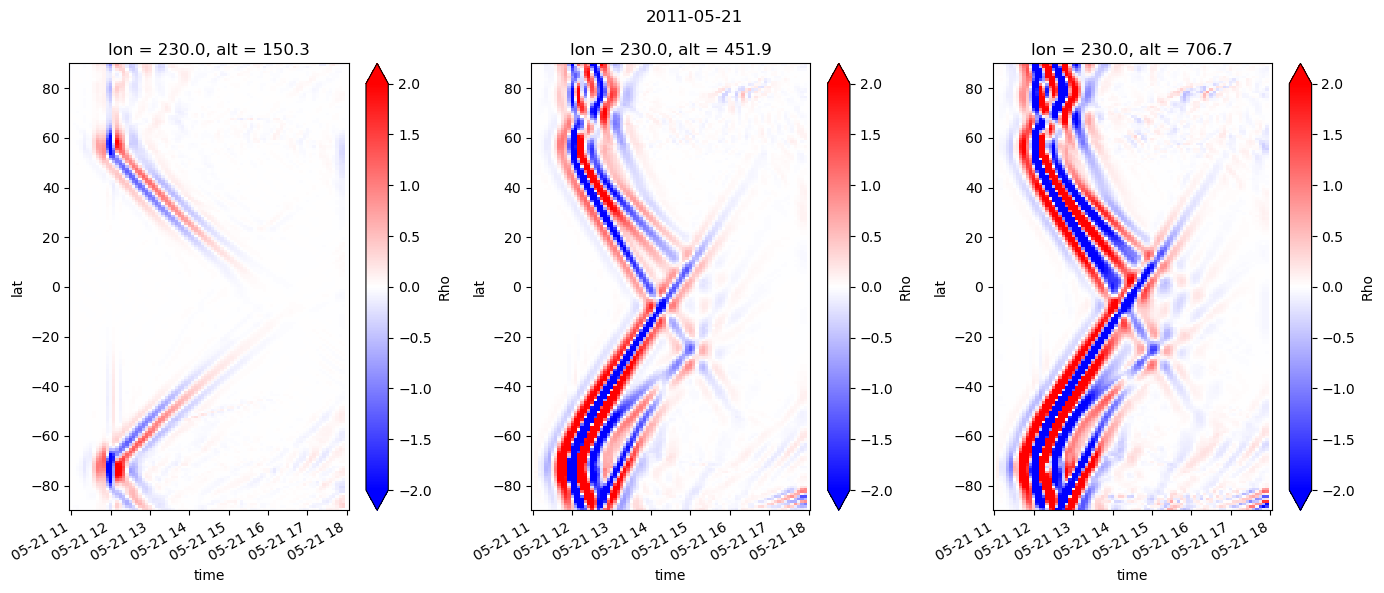

In [77]:
fig, axs = plt.subplots(nrows=1, ncols = 3, figsize=(14,6))

plot_args = {'x':'time',
            'vmin':-2,
            'vmax':2,
            'cmap':'bwr'}


full5_diffs.Rho.sel(lon=180+50, alt=150, method='nearest').plot(ax=axs[0], **plot_args)
# half11_diffs.Rho.sel(lon=180+50, alt=150, method='nearest').plot(ax=axs[1,0], **plot_args)

full5_diffs.Rho.sel(lon=180+50, alt=450, method='nearest').plot(ax=axs[1], **plot_args)
# half11_diffs.Rho.sel(lon=180+50, alt=450, method='nearest').plot(ax=axs[1,1], **plot_args)


full5_diffs.Rho.sel(lon=180+50, alt=700, method='nearest').plot(ax=axs[2], **plot_args)
# half11_diffs.Rho.sel(lon=180+50, alt=700, method='nearest').plot(ax=axs[1,2], **plot_args)

fig.suptitle('2011-05-21')
fig.tight_layout()
plt.show()
plt.close('all')

In [109]:
!hostname

cheyenne5
